In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

pd.options.display.max_rows = 50

## Exploring the Data
### 1. Loading
### 2. Renaming
### 3. Checking for missing values and zeros
### 4. Dropping duplicates
### 5. Checking outliers

In [22]:
file1 = pd.read_csv('abalone.csv')

In [23]:
def load_original_data():
    return pd.concat([file1])

In [24]:
aba=load_original_data()

In [25]:
aba

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [26]:
def lower_case_column_names(aba):
    aba.columns=[i.lower() for i in aba.columns]
    return aba

In [27]:
lower_case_column_names(aba)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [28]:
aba.isna().sum()

sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
dtype: int64

## no NAN values

In [29]:
aba.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [30]:
aba['height'].value_counts(0.00)

0.150    267
0.140    220
0.155    217
0.175    211
0.160    205
        ... 
0.015      2
0.000      2
0.010      1
0.515      1
1.130      1
Name: height, Length: 51, dtype: int64

## Two 0.000 values for height

In [31]:
aba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [32]:
aba.rename(columns={'shucked weight':'shucked_weight_meat'}, inplace=True)

In [33]:
aba.rename(columns={'viscera weight':'gut_weight'},inplace=True)

In [34]:
aba.rename(columns={'whole weight':'whole_weight'},inplace=True)

In [35]:
aba.rename(columns={'shell weight':'shell_weight'},inplace=True)

In [36]:
aba

,sex,length,diameter,height,whole_weight,shucked_weight_meat,gut_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [37]:
Q1=aba.quantile(0.10)
Q3=aba.quantile(0.90)
IQR=Q3 - Q1
print(IQR)

length                 0.3050
diameter               0.2570
height                 0.0950
whole_weight           1.2732
shucked_weight_meat    0.5605
gut_weight             0.2827
shell_weight           0.3550
rings                  8.0000
dtype: float64


In [39]:
aba_ed=aba[~((aba < (Q1-1.5*IQR)) | (aba > (Q3 + 1.5 * IQR))).any(axis=1)]
print(aba_ed.shape)

(4169, 9)


/var/folders/r9/4d41b7251kd4g8mywhld0w_80000gn/T/ipykernel_22295/744516010.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  aba_ed=aba[~((aba < (Q1-1.5*IQR)) | (aba > (Q3 + 1.5 * IQR))).any(axis=1)]


In [41]:
aba_ed.drop_duplicates()

,sex,length,diameter,height,whole_weight,shucked_weight_meat,gut_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Transforming the Data

## 1. Create new variable age
## 2. Transform sex to dummies

In [42]:
aba['age']=aba_ed['rings']+1.5

In [43]:
aba_ed.drop(['rings'], axis=1)

,sex,length,diameter,height,whole_weight,shucked_weight_meat,gut_weight,shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [44]:
aba_ed.drop_duplicates()

,sex,length,diameter,height,whole_weight,shucked_weight_meat,gut_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [45]:
sex_num = pd.get_dummies(aba_ed['sex'])  
aba = pd.concat([aba_ed,sex_num],axis=1)

In [46]:
aba = pd.concat([aba_ed,sex_num],axis=1)

In [47]:
aba

,sex,length,diameter,height,whole_weight,shucked_weight_meat,gut_weight,shell_weight,rings,F,I,M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [48]:
aba['age']=aba['rings']+1.5

In [49]:
aba

,sex,length,diameter,height,whole_weight,shucked_weight_meat,gut_weight,shell_weight,rings,F,I,M,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0,11.5


In [50]:
aba.drop(['rings'], axis=1)

,sex,length,diameter,height,whole_weight,shucked_weight_meat,gut_weight,shell_weight,F,I,M,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0,11.5


# Model preperation
## 1. X Y Split
## 2. Drop redundant variables
## 3. Get numeric data 

In [51]:
X=aba.drop(['rings', 'age', 'length'], axis=1)

In [52]:
X

,sex,diameter,height,whole_weight,shucked_weight_meat,gut_weight,shell_weight,F,I,M
0,M,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,M,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,F,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,M,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,I,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,M,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,M,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,F,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [53]:
y=aba.rings

In [54]:
sex_num=sex_num.astype('Int64')

In [55]:
aba.dtypes

sex                     object
length                 float64
diameter               float64
height                 float64
whole_weight           float64
shucked_weight_meat    float64
gut_weight             float64
shell_weight           float64
rings                    int64
F                        uint8
I                        uint8
M                        uint8
age                    float64
dtype: object

In [56]:
X=X._get_numeric_data()
X

,diameter,height,whole_weight,shucked_weight_meat,gut_weight,shell_weight,F,I,M
0,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...
4172,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


# Linear Regression 
## Train

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [61]:
std_scaler=StandardScaler().fit(X_train)

In [62]:
X_train_scaled=std_scaler.transform(X_train)

In [63]:
X_train_scaled=std_scaler.transform(X_train)

In [64]:
X_train.shape

(2918, 9)

In [65]:
X_test_scaled=std_scaler.transform(X_test)
X_train_scaled

array([[ 0.57456063,  0.27723626,  0.31208555, ..., -0.68342438,
        -0.68990847,  1.33579607],
       [-2.29541266, -2.19034006, -1.58553647, ..., -0.68342438,
         1.44946764, -0.74861726],
       [-1.84225899, -1.80072275, -1.39464534, ...,  1.46321968,
        -0.68990847, -0.74861726],
       ...,
       [ 0.47385981,  0.4071087 ,  0.11811553, ..., -0.68342438,
        -0.68990847,  1.33579607],
       [ 0.62491103,  0.79672602,  0.87654856, ...,  1.46321968,
        -0.68990847, -0.74861726],
       [ 1.12841512,  1.44608821,  1.64113937, ...,  1.46321968,
        -0.68990847, -0.74861726]])

In [66]:
X_test_scaled

array([[ 0.52421022,  0.53698114,  0.84473337, ..., -0.68342438,
         1.44946764, -0.74861726],
       [ 0.77596226,  0.92659845,  0.90220597, ..., -0.68342438,
        -0.68990847,  1.33579607],
       [-0.23104591,  0.14736383, -0.43197933, ..., -0.68342438,
        -0.68990847,  1.33579607],
       ...,
       [-0.83525081, -0.50199837, -0.98925827, ..., -0.68342438,
         1.44946764, -0.74861726],
       [-1.18770367, -1.02148812, -1.11549273, ..., -0.68342438,
         1.44946764, -0.74861726],
       [-0.88560122, -1.54097787, -1.01696827, ..., -0.68342438,
         1.44946764, -0.74861726]])

In [67]:
X.columns

Index(['diameter', 'height', 'whole_weight', 'shucked_weight_meat',
       'gut_weight', 'shell_weight', 'F', 'I', 'M'],
      dtype='object')

## Regression

In [68]:
model=LinearRegression()

In [69]:
model.fit(X_train_scaled, y_train) 

LinearRegression()

In [70]:
model.coef_

array([ 0.84185376,  0.80592077,  4.12175045, -4.23602848, -1.07134934,
        1.17521954,  0.1042907 , -0.22667022,  0.11957949])

In [71]:
model.intercept_

9.898903358464702

## Predict

In [72]:
y_pred=model.predict(X_test_scaled)

In [73]:
y_pred_train=model.predict(X_train_scaled)

In [74]:
y_pred=model.predict(X_test_scaled)
y_pred_train=model.predict(X_test_scaled)

In [75]:
y_test

2394    14
2251    13
670     14
2744    11
4172    11
        ..
1744    11
3486     8
2010     7
4164     7
112      9
Name: rings, Length: 1251, dtype: int64

In [76]:
X

,diameter,height,whole_weight,shucked_weight_meat,gut_weight,shell_weight,F,I,M
0,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...
4172,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [77]:
model.score(X_test, y_test)

-0.2383606266183964

In [78]:
result=pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
print(result)

      y_test     y_pred
2394      14  10.392307
2251      13  12.774801
670       14  11.180491
2744      11   9.418616
4172      11  10.814718
...      ...        ...
1744      11  10.800514
3486       8  10.676138
2010       7   7.792672
4164       7   7.282543
112        9   7.286757

[1251 rows x 2 columns]


## Residuals Check

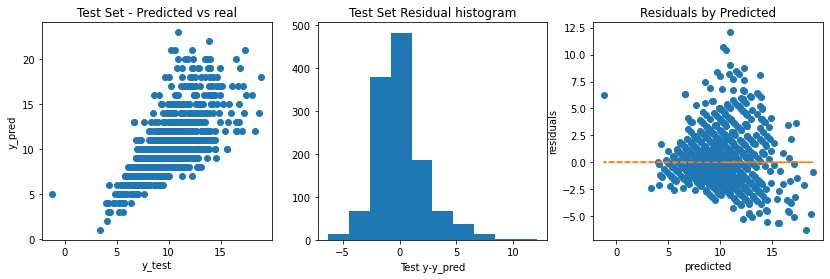

In [79]:
fig, ax= plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel('y_test')
ax[0].set_ylabel('y_pred')
ax[0].set_title('Test Set - Predicted vs real')

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel('Test y-y_pred')
ax[1].set_title('Test Set Residual histogram')

ax[2].plot(y_pred,y_test - y_pred, 'o')
ax[2].set_xlabel('predicted')
ax[2].set_ylabel('residuals')
ax[2].set_title('Residuals by Predicted')
ax[2].plot(y_pred,np.zeros(len(y_pred)), linestyle='dashed')

## OLS Regression Output

In [216]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [217]:
from sklearn.metrics import r2_score

In [218]:
print(mse(y_test, y_pred))
print(mae(y_test, y_pred))

4.93273909971621
1.6032076101009873


In [219]:
R2=r2_score(y_test,y_pred)

In [220]:
R2

0.49750576007889624

In [221]:
model.score(X_test, y_test)

-0.2383606266183964

In [222]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [223]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.4938615633349076

In [224]:
features_importances = pd.DataFrame(data={'Attribute': X_train.columns,'Importance': abs(model.coef_)})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [225]:
features_importances

,Attribute,Importance
3,shucked_weight_meat,4.236028
2,whole_weight,4.121750
5,shell_weight,1.175220
4,gut_weight,1.071349
0,diameter,0.841854
1,height,0.805921
7,I,0.226670
8,M,0.119579
6,F,0.104291


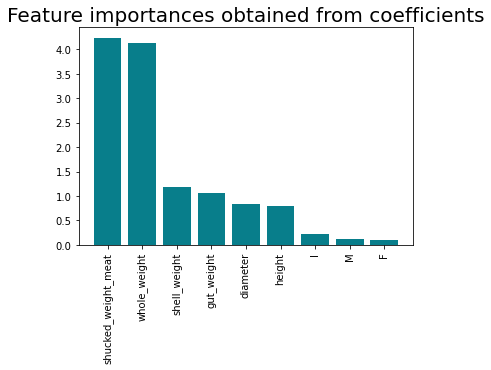

In [226]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [227]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary(xname=['const'] + list(X.columns))
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  rings   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     460.5
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:26:17   Log-Likelihood:                -6351.7
No. Observations:                2918   AIC:                         1.272e+04
Df Residuals:                    2909   BIC:                         1.278e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.8989    

In [228]:
X

,diameter,height,whole_weight,shucked_weight_meat,gut_weight,shell_weight,F,I,M
0,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...
4172,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


Multikorrelation

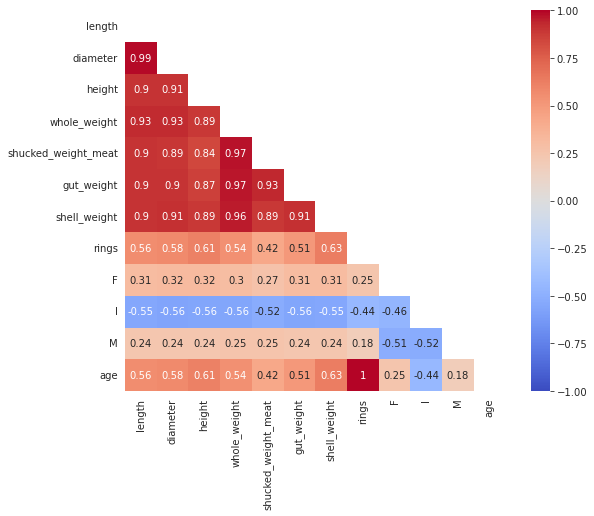

In [179]:
corr = aba.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [184]:
aba['age'].mean()

11.418685536099785

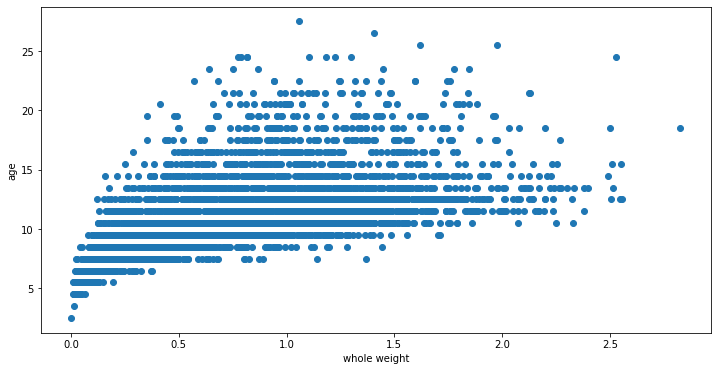

In [231]:
fig,ax = plt.subplots(figsize=(12,6))
ax.scatter(aba['whole_weight'],aba['age'])
ax.set_xlabel('whole weight')
ax.set_ylabel('age')
plt.show()